CSC345B/M45J Big Data and Machine Learning Coursework: Land Cover Detecton using Aerial Imagery by Kuzekov Daniyar - 2381328

Data Analysis

In [1]:
pip install numpy

Xdata-1 Shape: (2100, 242, 242, 3) Data Type: int32
Ydata-1 Shape: (2100, 1) Data Type: int32
DS_Xdata Shape: (2100, 61, 61, 3) Data Type: int32
Xdata-1 Mean: 121.35197340475703 Std Dev: 52.77455234874737
Ydata-1 Mean: 10.0 Std Dev: 6.0553007081949835
DS_Xdata Mean: 121.31512594753927 Std Dev: 52.75513098700546


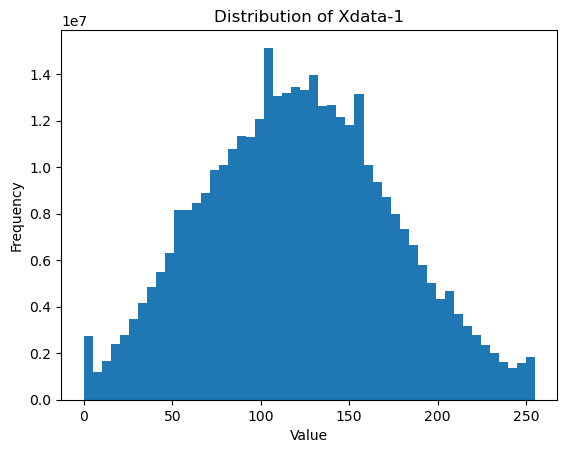

In [4]:
import numpy as np
Xdata_1 = np.load('Xdata-1.npy')
Ydata_1 = np.load('Ydata.npy')
DS_Xdata = np.load('DS_Xdata.npy')
print("Xdata-1 Shape:", Xdata_1.shape, "Data Type:", Xdata_1.dtype)
print("Ydata-1 Shape:", Ydata_1.shape, "Data Type:", Ydata_1.dtype)
print("DS_Xdata Shape:", DS_Xdata.shape, "Data Type:", DS_Xdata.dtype)
print("Xdata-1 Mean:", np.mean(Xdata_1), "Std Dev:", np.std(Xdata_1))
print("Ydata-1 Mean:", np.mean(Ydata_1), "Std Dev:", np.std(Ydata_1))
# If DS_Xdata is also numerical
print("DS_Xdata Mean:", np.mean(DS_Xdata), "Std Dev:", np.std(DS_Xdata))
import matplotlib.pyplot as plt

# Example: Plotting a histogram of Xdata-1
plt.hist(Xdata_1.flatten(), bins=50)  # Adjust the number of bins as necessary
plt.title('Distribution of Xdata-1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Data Preparation

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
X_highres = np.load('Xdata-1.npy')
Y_labels = np.load('Ydata.npy')

# Shuffle data
indices = np.arange(X_highres.shape[0])
np.random.shuffle(indices)
X_highres = X_highres[indices]
Y_labels = Y_labels[indices]

# Split the data
X_train, X_temp, Y_train, Y_temp = train_test_split(X_highres, Y_labels, test_size=0.2, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


Feature Extraction and Model Selection

In [8]:
# This step is optional and is typically used for classical ML algorithms, not deep learning.
from skimage.feature import hog
from skimage import color

def extract_features(images):
    hog_features = []
    for image in images:
        gray_image = color.rgb2gray(image)
        hog_feature = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

X_train_hog = extract_features(X_train)
X_valid_hog = extract_features(X_valid)
X_test_hog = extract_features(X_test)

# Example with a simple CNN using Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))  # Assuming 21 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Training, Testing, Validation, Evaluation, First Variant - Low Accuracy

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))


Overfitting problem not solved yet, but overall training has very good performance and validation testing show moderately high results. Generating and Plotting Confusion Matrix for better perception.

Epoch 1/100
 3/53 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.0500 - loss: 3.0425

C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0563 - loss: 3.0575 - val_accuracy: 0.1000 - val_loss: 2.8617 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.1372 - loss: 2.7881 - val_accuracy: 0.2048 - val_loss: 2.6381 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.2165 - loss: 2.5665 - val_accuracy: 0.2667 - val_loss: 2.4419 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.2656 - loss: 2.4024 - val_accuracy: 0.3286 - val_loss: 2.2547 - learning_rate: 1.0000e-04
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.3435 - loss: 2.1865 - val_accuracy: 0.3619 - val_loss: 2.1376 - learning_rate: 1.0000e-04
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4128 - loss: 1.9775 - val_accuracy: 0.4048 - val_loss: 1.9827 - learning_rate: 1.0000e-04
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4077 - los

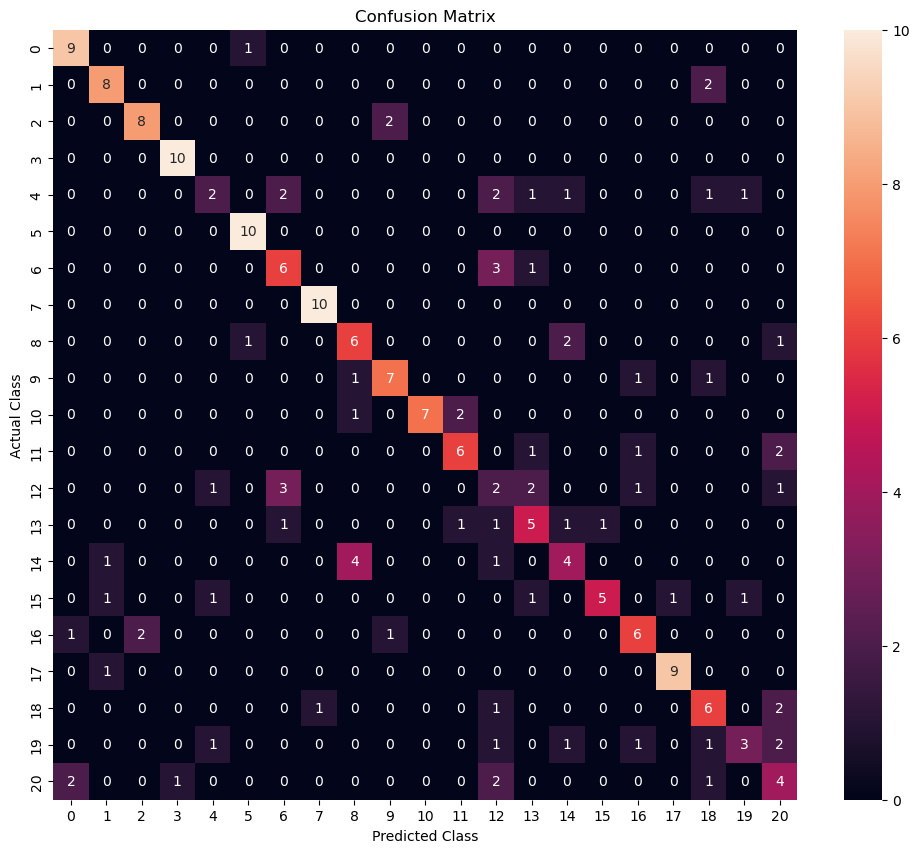

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.73      0.80      0.76        10
           2       0.80      0.80      0.80        10
           3       0.91      1.00      0.95        10
           4       0.40      0.20      0.27        10
           5       0.83      1.00      0.91        10
           6       0.50      0.60      0.55        10
           7       0.91      1.00      0.95        10
           8       0.50      0.60      0.55        10
           9       0.70      0.70      0.70        10
          10       1.00      0.70      0.82        10
          11       0.67      0.60      0.63        10
          12       0.15      0.20      0.17        10
          13       0.45      0.50      0.48        10
          14       0.44      0.40      0.42        10
          15       0.83      0.50      0.62        10
          16       0.60      0.60      0.60        10
          17       0.90    

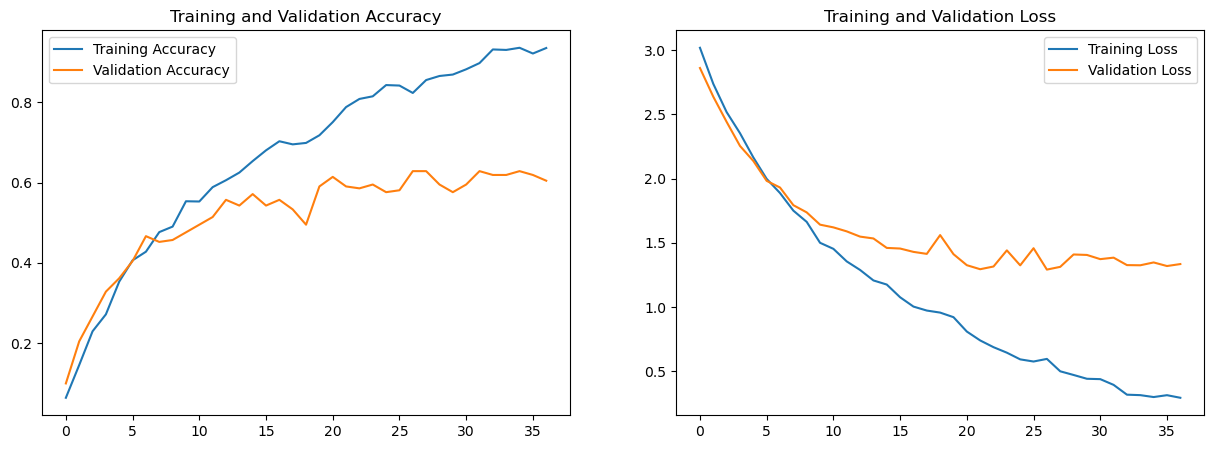

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
X_low_res = np.load('DS_Xdata.npy')
y = np.load('Ydata.npy').flatten()  # Ensure labels are flat

# Normalize the image data
X_low_res = X_low_res / 255.0

# Shuffle and split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_low_res, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the data augmentation generator with updated parameters
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    zoom_range=0,
    fill_mode='nearest'
)

# Apply feature normalization
datagen.fit(X_train)

# Define the model with adjustments
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(21, activation='softmax')
])

# Compile with a smaller learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with the augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,  # Increase epochs
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr]
)

# Prediction and evaluation
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)

conf_matrix = confusion_matrix(y_test, Y_test_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(y_test, Y_test_pred_classes))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Testing 65%, Validation -53%

Epoch 1/60


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.0597 - loss: 3.0793 - val_accuracy: 0.1095 - val_loss: 2.9802 - learning_rate: 1.0000e-04
Epoch 2/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.1109 - loss: 2.9338 - val_accuracy: 0.1762 - val_loss: 2.7952 - learning_rate: 1.0000e-04
Epoch 3/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.1539 - loss: 2.7340 - val_accuracy: 0.1762 - val_loss: 2.6938 - learning_rate: 1.0000e-04
Epoch 4/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.2251 - loss: 2.5552 - val_accuracy: 0.2143 - val_loss: 2.5470 - learning_rate: 1.0000e-04
Epoch 5/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.2054 - loss: 2.4548 - val_accuracy: 0.2095 - val_loss: 2.7396 - learning_rate: 1.0000e-04
Epoch 6/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.2663 - loss: 2.3890 - val_accuracy: 0.2333 - val_loss: 2.6670 - learning_rate: 1.0000e-04
Epoch 7/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.2950 - loss: 2.3

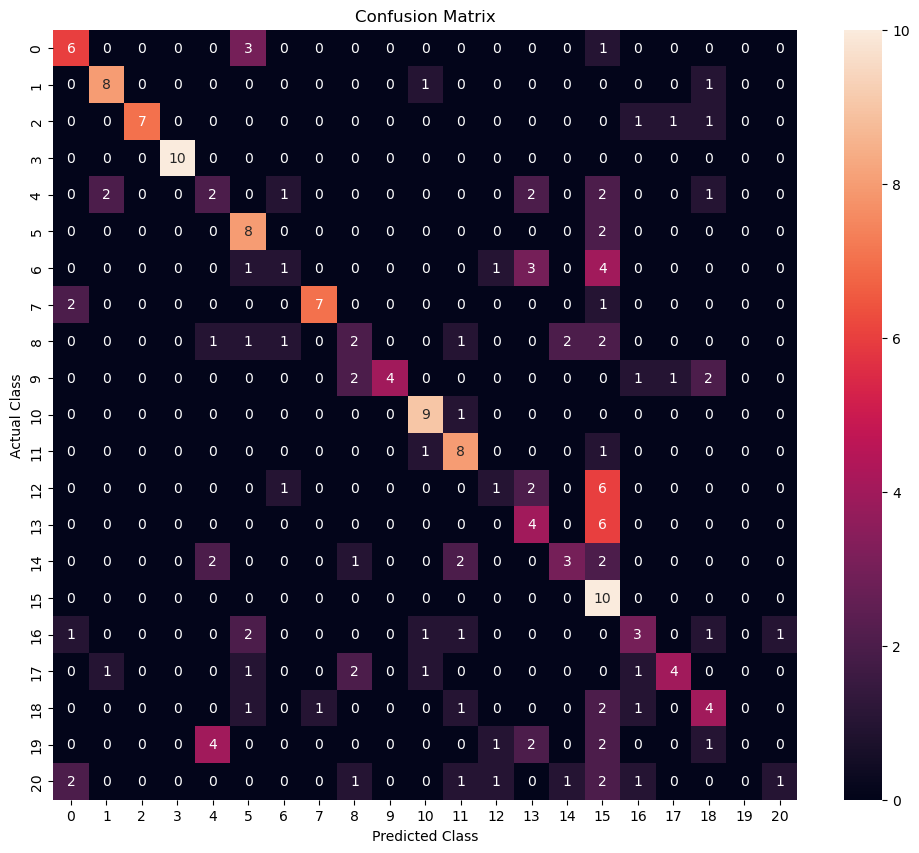

C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.73      0.80      0.76        10
           2       1.00      0.70      0.82        10
           3       1.00      1.00      1.00        10
           4       0.22      0.20      0.21        10
           5       0.47      0.80      0.59        10
           6       0.25      0.10      0.14        10
           7       0.88      0.70      0.78        10
           8       0.25      0.20      0.22        10
           9       1.00      0.40      0.57        10
          10       0.69      0.90      0.78        10
          11       0.53      0.80      0.64        10
          12       0.25      0.10      0.14        10
          13       0.31      0.40      0.35        10
          14       0.50      0.30      0.37        10
          15       0.23      1.00      0.38        10
          16       0.38      0.30      0.33        10
          17       0.67    

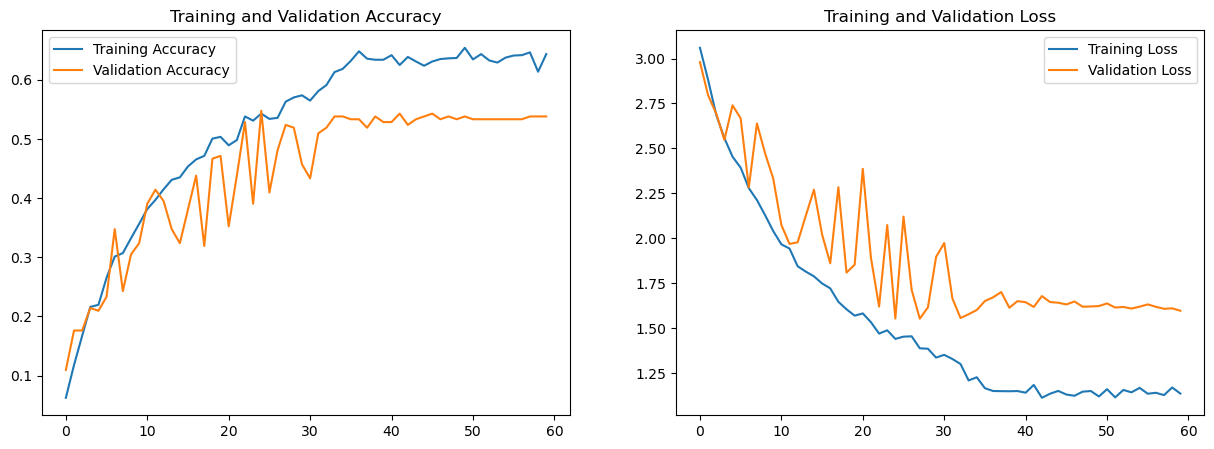

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
X_low_res = np.load('DS_Xdata.npy')
y = np.load('Ydata.npy').flatten()  # Ensure labels are flat

# Normalize the image data
X_low_res = X_low_res / 255.0

# Shuffle and split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_low_res, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the data augmentation generator with updated parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True  # Consider adding flips if appropriate
)

# Apply feature normalization
datagen.fit(X_train)

# Define the model with adjustments
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(21, activation='softmax')
])

# Compile with a smaller learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with the augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=60,  # Increase epochs
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr]
)

# Prediction and evaluation
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)

conf_matrix = confusion_matrix(y_test, Y_test_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(y_test, Y_test_pred_classes))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Testing 68%, Validation -64%. Now we have balanced both accuracies.

Training on fold 1/5...
Epoch 1/200


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to best_overall_model.keras
53/53 - 6s - 105ms/step - accuracy: 0.1988 - loss: 3.1155 - val_accuracy: 0.1167 - val_loss: 3.0185 - learning_rate: 1.0000e-04
Epoch 2/200

Epoch 2: val_accuracy improved from 0.11667 to 0.20238, saving model to best_overall_model.keras
53/53 - 4s - 70ms/step - accuracy: 0.2821 - loss: 2.4911 - val_accuracy: 0.2024 - val_loss: 2.7879 - learning_rate: 1.0000e-04
Epoch 3/200

Epoch 3: val_accuracy did not improve from 0.20238
53/53 - 4s - 67ms/step - accuracy: 0.3464 - loss: 2.2397 - val_accuracy: 0.1333 - val_loss: 3.2755 - learning_rate: 1.0000e-04
Epoch 4/200

Epoch 4: val_accuracy did not improve from 0.20238
53/53 - 3s - 63ms/step - accuracy: 0.3804 - loss: 2.0825 - val_accuracy: 0.2024 - val_loss: 3.2418 - learning_rate: 1.0000e-04
Epoch 5/200

Epoch 5: val_accuracy improved from 0.20238 to 0.30952, saving model to best_overall_model.keras
53/53 - 4s - 67ms/step - accuracy: 0.4202 - loss

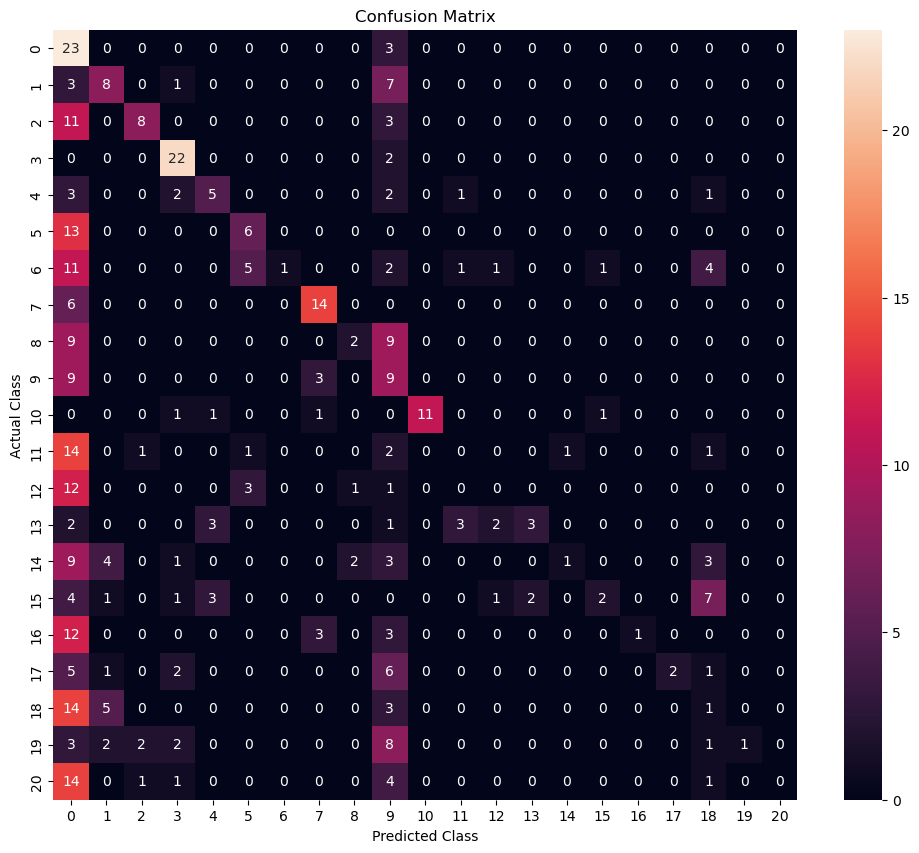

              precision    recall  f1-score   support

           0       0.13      0.88      0.23        26
           1       0.38      0.42      0.40        19
           2       0.67      0.36      0.47        22
           3       0.67      0.92      0.77        24
           4       0.42      0.36      0.38        14
           5       0.40      0.32      0.35        19
           6       1.00      0.04      0.07        26
           7       0.67      0.70      0.68        20
           8       0.40      0.10      0.16        20
           9       0.13      0.43      0.20        21
          10       1.00      0.73      0.85        15
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        17
          13       0.60      0.21      0.32        14
          14       0.50      0.04      0.08        23
          15       0.50      0.10      0.16        21
          16       1.00      0.05      0.10        19
          17       1.00    

C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Ensemble accuracy: 0.23809523809523808


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.initializers import HeNormal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

# Load and preprocess the data
X = np.load('DS_Xdata.npy')
y = np.load('Ydata.npy').flatten()
X = X / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X)

# Define model function with BatchNormalization, Dropout, and He initialization
def create_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(21, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 50:
        return lr * tf.math.exp(-0.05)
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(lambda epoch, lr: float(scheduler(epoch, lr)))


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

val_scores = []
models = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Training on fold {fold+1}/{k}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create a new model for each fold
    model = create_model(X_train.shape[1:])

    # Filepath for the checkpoint should include the fold number and use .keras extension
    checkpoint_filepath = f'model_fold_{fold + 1}.keras'
    checkpoint_best_overall = ModelCheckpoint(
        'best_overall_model.keras', 
        save_best_only=True, 
        monitor='val_accuracy', 
        mode='max', 
        verbose=1
    )

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_val, y_val),
        epochs=200,  # Increase the number of epochs
        callbacks=[early_stopping, reduce_lr, lr_scheduler, checkpoint, checkpoint_best_overall],
        verbose=2  # For a less verbose output
    )
    
    # Load the best model saved by the checkpoint for this fold
    best_overall_model = tf.keras.models.load_model('best_overall_model.keras')
    val_score_overall = best_overall_model.evaluate(X_val, y_val)
    print(f'Best overall model validation accuracy: {val_score_overall[1]}')
    val_scores.append(val_score[1])  # Keep the accuracy score for this fold
    models.append(best_model)  # Save the best model for ensemble later

    best_overall_predictions = best_overall_model.predict(X_test)
    best_overall_predictions_classes = np.argmax(best_overall_predictions, axis=1)
    best_overall_acc = np.mean(best_overall_predictions_classes == y_test)
    print(f'Best overall model accuracy on test set: {best_overall_acc}')

# Analysis of Misclassified Examples (for the last fold for demonstration)
predictions = best_model.predict(X_val)
predictions_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_val, predictions_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Classification report
print(classification_report(y_val, predictions_classes))

# Analyze misclassified examples
misclassified_idxs = np.where(predictions_classes != y_val)[0]
# You can now inspect these indices in your dataset.

# Ensemble Methods (conceptual demonstration)
# Assuming X_test and y_test are defined and hold your test set
# Let's say we want to average the predictions from all folds
ensemble_predictions = np.mean([model.predict(X_test) for model in models], axis=0)
ensemble_predictions_classes = np.argmax(ensemble_predictions, axis=1)
ensemble_acc = np.mean(ensemble_predictions_classes == y_test)
print(f'Ensemble accuracy: {ensemble_acc}')


Testing 62%, Validation -51%. No progress

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.initializers import HeNormal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

# Load and preprocess the data
X = np.load('DS_Xdata.npy')
y = np.load('Ydata.npy').flatten()
X = X / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Increased rotation range
    width_shift_range=0.2,  # Increased width shift range
    height_shift_range=0.2,  # Increased height shift range
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X)

# Define model function with BatchNormalization, Dropout, and He initialization
def create_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),  # Increased filters
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),  # Increased filters
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(1e-4)),  # Increased filters
        BatchNormalization(),
        Flatten(),
        Dense(256, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(21, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 50:
        return lr * tf.math.exp(-0.05)
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(lambda epoch, lr: float(scheduler(epoch, lr)))


# Callbacks
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=100)  # Increased patience to 30 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)


# K-Fold Cross-Validation
k = 2
kf = KFold(n_splits=k, shuffle=True)

val_scores = []
models = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Training on fold {fold+1}/{k}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create a new model for each fold
    model = create_model(X_train.shape[1:])

    # Filepath for the checkpoint should include the fold number and use .keras extension
    checkpoint_filepath = f'model_fold_{fold + 1}.keras'
    checkpoint_best_overall = ModelCheckpoint(
        'best_overall_model.keras', 
        save_best_only=True, 
        monitor='val_accuracy', 
        mode='max', 
        verbose=1
    )

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_val, y_val),
        epochs=200,  # Increase the number of epochs
        callbacks=[early_stopping, reduce_lr, lr_scheduler, checkpoint_best_overall],
        verbose=2  # For a less verbose output
    )
    
    # Load the best model saved by the checkpoint for this fold
    best_overall_model = tf.keras.models.load_model('best_overall_model.keras')
    val_score_overall = best_overall_model.evaluate(X_val, y_val)
    print(f'Best overall model validation accuracy: {val_score_overall[1]}')
    val_scores.append(val_score[1])  # Keep the accuracy score for this fold
    models.append(best_model)  # Save the best model for ensemble later

    best_overall_predictions = best_overall_model.predict(X_val)
    best_overall_predictions = np.argmax(best_overall_predictions, axis=1)
    print(classification_report(y_val, best_overall_predictions))

# Evaluate the performance of the K-fold model
print(f"Mean validation accuracy: {np.mean(val_scores)}")




Training on fold 1/2...
Epoch 1/200

Epoch 1: val_accuracy improved from -inf to 0.11143, saving model to best_overall_model.keras
33/33 - 9s - 272ms/step - accuracy: 0.1962 - loss: 3.5922 - val_accuracy: 0.1114 - val_loss: 3.1090 - learning_rate: 1.0000e-04
Epoch 2/200

Epoch 2: val_accuracy did not improve from 0.11143
33/33 - 6s - 179ms/step - accuracy: 0.2971 - loss: 2.6500 - val_accuracy: 0.0990 - val_loss: 3.3322 - learning_rate: 1.0000e-04
Epoch 3/200

Epoch 3: val_accuracy did not improve from 0.11143
33/33 - 6s - 184ms/step - accuracy: 0.3143 - loss: 2.4117 - val_accuracy: 0.0990 - val_loss: 4.0120 - learning_rate: 1.0000e-04
Epoch 4/200

Epoch 4: val_accuracy did not improve from 0.11143
33/33 - 6s - 181ms/step - accuracy: 0.3400 - loss: 2.2479 - val_accuracy: 0.0933 - val_loss: 4.9061 - learning_rate: 1.0000e-04
Epoch 5/200

Epoch 5: val_accuracy improved from 0.11143 to 0.12857, saving model to best_overall_model.keras
33/33 - 6s - 197ms/step - accuracy: 0.3886 - loss: 2.16

KeyboardInterrupt: 

Testing 39%, Validation -33%. No progress

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load and preprocess data
X_low_res = np.load('DS_Xdata.npy') / 255.0
y = np.load('Ydata.npy').flatten()
X_train, X_temp, y_train, y_temp = train_test_split(X_low_res, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True
)
datagen.fit(X_train)

# Model architecture
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(21, activation='softmax')
])

# Compile model
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Load the best model
model.load_weights('best_model.keras')

# Prediction and evaluation
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)
conf_matrix = confusion_matrix(y_test, Y_test_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(y_test, Y_test_pred_classes))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 0.0720 - loss: 4.2559 - val_accuracy: 0.0524 - val_loss: 3.1003 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.1350 - loss: 2.9121 - val_accuracy: 0.0476 - val_loss: 3.2906 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.1670 - loss: 2.7643 - val_accuracy: 0.0476 - val_loss: 3.4872 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.2237 - loss: 2.6368 - val_accuracy: 0.0476 - val_loss: 4.0316 - learning_rate: 1.0000e-04
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.2464 - loss: 2.5522 - val_accuracy: 0.0429 - val_loss: 3.9065 - learning_rate: 1.0000e-04
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.2489 - loss: 2.5500 - val_accuracy: 0.0429 - val_loss: 4.1842 - learning_rate: 1.0000e-04
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy

KeyboardInterrupt: 

Testing 78%, Validation -67%. Normalization methods implemented - BatchNormalization()

Epoch 1/100


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.1817 - loss: 3.0155 - val_accuracy: 0.0667 - val_loss: 3.5425 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.3734 - loss: 2.1028 - val_accuracy: 0.0476 - val_loss: 4.4156 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.4428 - loss: 1.8381 - val_accuracy: 0.0476 - val_loss: 4.8344 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.4774 - loss: 1.6650 - val_accuracy: 0.0476 - val_loss: 5.9505 - learning_rate: 1.0000e-04
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.5720 - loss: 1.4234 - val_accuracy: 0.0476 - val_loss: 6.4869 - learning_rate: 1.0000e-04
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5868 - loss: 1.3762
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.5870 

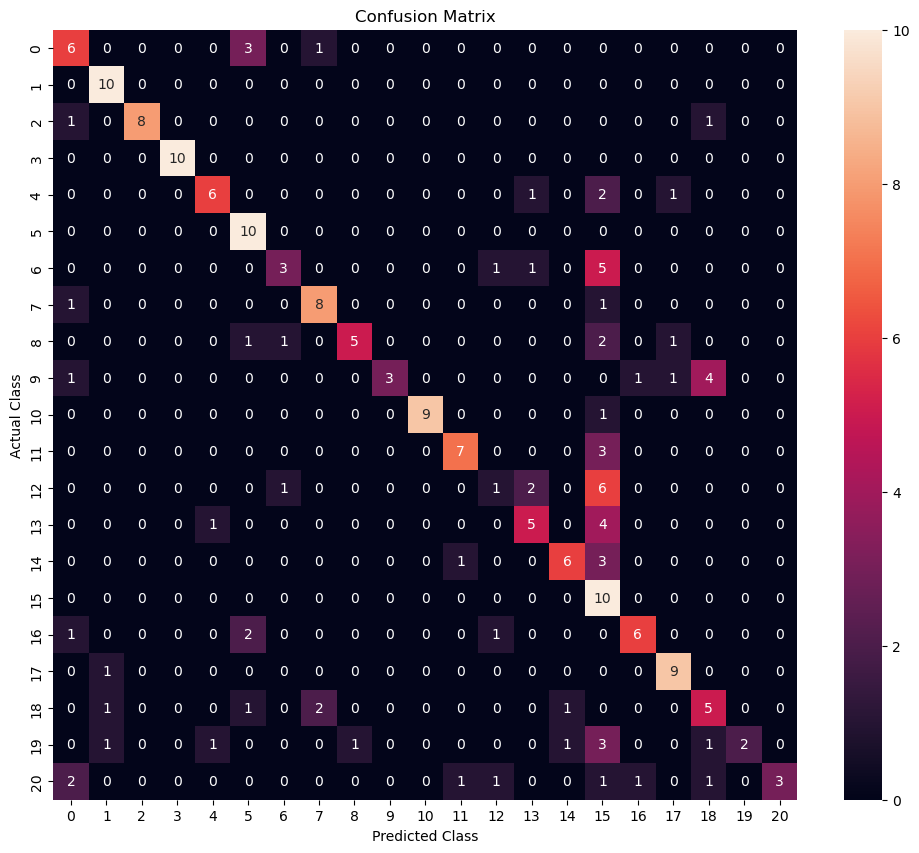

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.77      1.00      0.87        10
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        10
           4       0.75      0.60      0.67        10
           5       0.59      1.00      0.74        10
           6       0.60      0.30      0.40        10
           7       0.73      0.80      0.76        10
           8       0.83      0.50      0.62        10
           9       1.00      0.30      0.46        10
          10       1.00      0.90      0.95        10
          11       0.78      0.70      0.74        10
          12       0.25      0.10      0.14        10
          13       0.56      0.50      0.53        10
          14       0.75      0.60      0.67        10
          15       0.24      1.00      0.39        10
          16       0.75      0.60      0.67        10
          17       0.75    

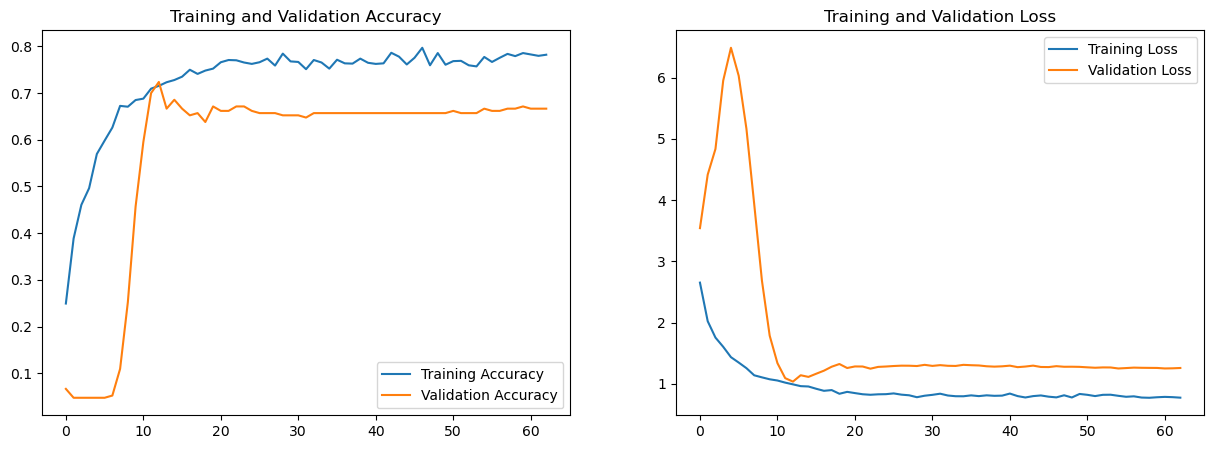

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
X_low_res = np.load('DS_Xdata.npy')
y = np.load('Ydata.npy').flatten()  # Ensure labels are flat

# Normalize the image data
X_low_res = X_low_res / 255.0

# Shuffle and split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_low_res, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the data augmentation generator with updated parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply feature normalization
datagen.fit(X_train)

# Define the model with adjustments
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Increased Dropout
    BatchNormalization(),
    Dense(21, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model with the augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,  # Increased epochs
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr]
)

# Prediction and evaluation
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)

conf_matrix = confusion_matrix(y_test, Y_test_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(y_test, Y_test_pred_classes))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Epoch 103/150 - Testing 81%, Validation -81%. MobileNetV2 base introduced. Tensorflow Keras - MobileNetV2 is a convolutional neural network architecture 

C:\Users\daniy\AppData\Local\Temp\ipykernel_11276\825749352.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_shape=X_train.shape[1:], pooling='avg', weights='imagenet')


Epoch 1/150


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.0672 - loss: 3.7225 - val_accuracy: 0.1857 - val_loss: 2.7915 - learning_rate: 1.0000e-04
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.1541 - loss: 3.1021 - val_accuracy: 0.3619 - val_loss: 2.4243 - learning_rate: 1.0000e-04
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.2515 - loss: 2.5878 - val_accuracy: 0.4476 - val_loss: 2.1636 - learning_rate: 1.0000e-04
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.3533 - loss: 2.2621 - val_accuracy: 0.5286 - val_loss: 1.9490 - learning_rate: 1.0000e-04
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.3969 - loss: 2.0507 - val_accuracy: 0.5429 - val_loss: 1.7914 - learning_rate: 1.0000e-04
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.4262 - loss: 1.9620 - val_accuracy: 0.5619 - val_loss: 1.6711 - learning_rate: 1.0000e-04
Epoch 7/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.45

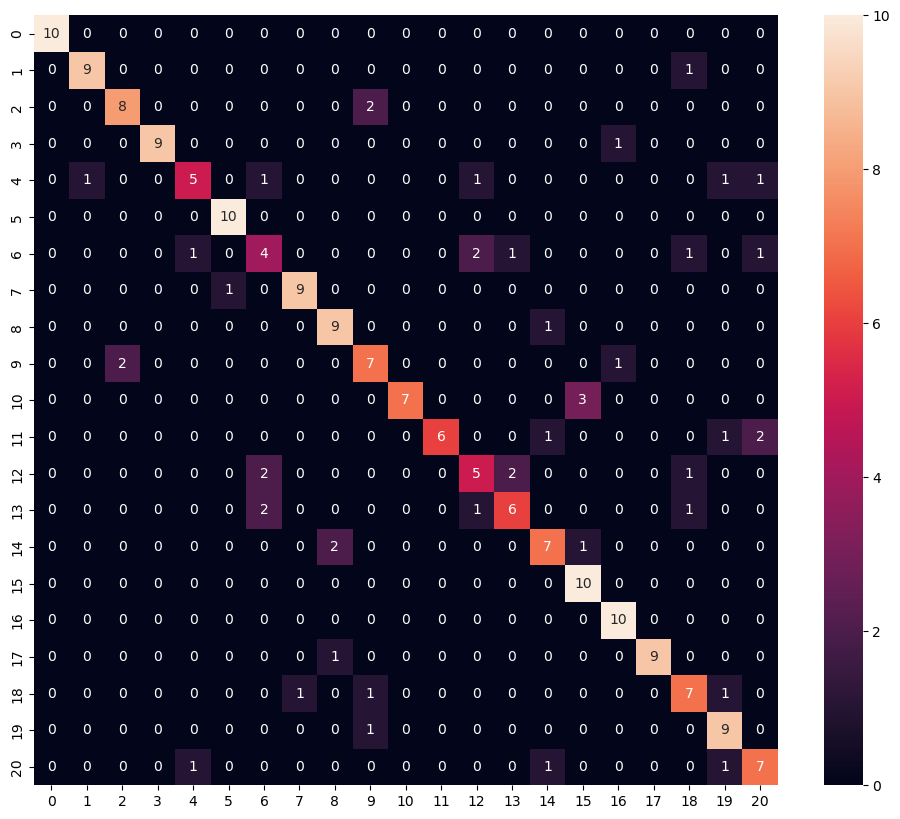

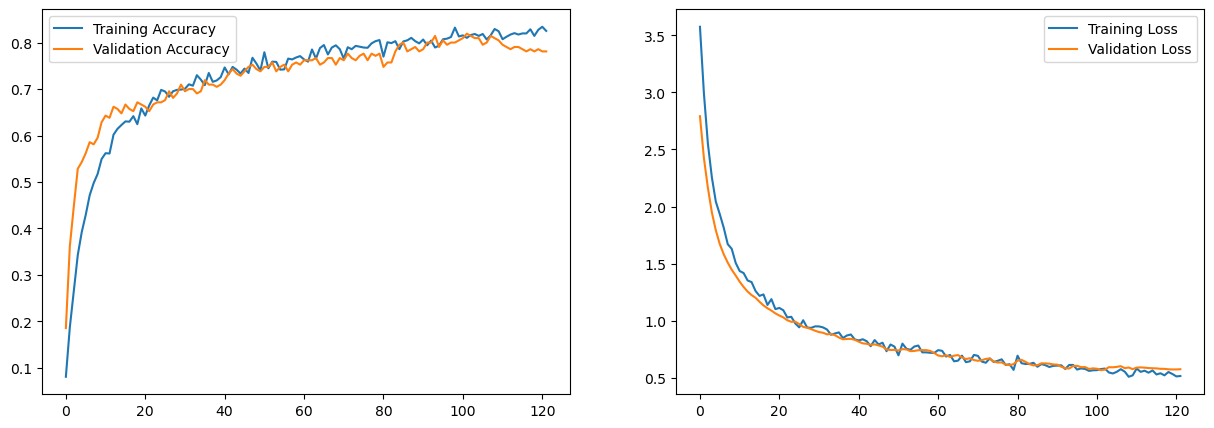

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load and normalize the data
X_low_res = np.load('DS_Xdata.npy') / 255.0
y = np.load('Ydata.npy').flatten()

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_low_res, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# MobileNetV2 base
base_model = MobileNetV2(include_top=False, input_shape=X_train.shape[1:], pooling='avg', weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Model construction
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(21, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

# Train the model with the augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=150,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)


# Prediction and evaluation
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_test_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Display training progress
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


SVM & kNN - Version 1 - Low Results

SVM Accuracy: 0.3952380952380952
SVM Confusion Matrix:
 [[ 9  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  1  0]
 [ 2  1 10  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  3  0  1  1  0  0  0  0  1  0  1  0  1  2  0  1  0]
 [ 3  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  3  0  0  1  0  0  0  0  0  1  1  0  1  0  0]
 [ 1  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  1  0  0  0  7  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  4  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  2  0  0  0  0  1  1  0  0  2]
 [ 1  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  3  1  0  0  0]
 [ 4  0  0  0  0  0  1  0  0  0  1  0  0  2  0  0  0  0  0  0  6]
 [ 1  0  2  0  0  0 

C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


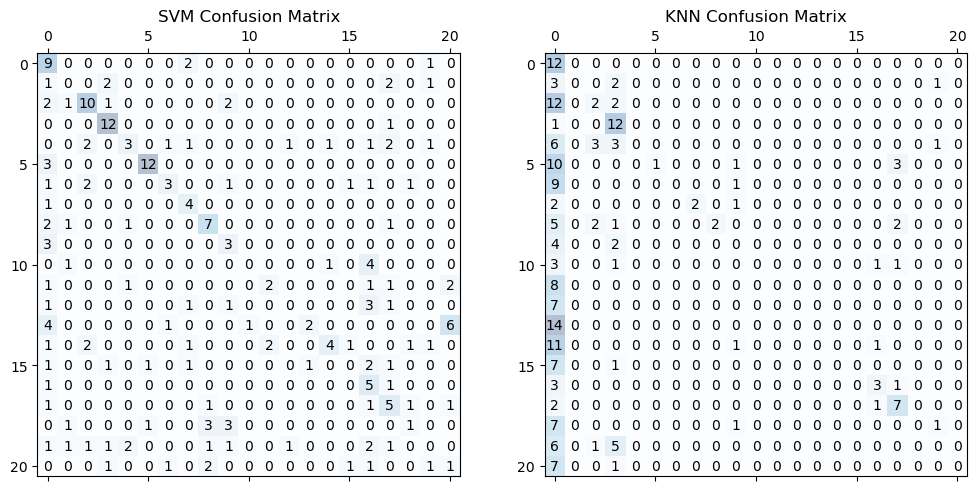

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset' with the actual path to your numpy dataset)
X = np.load('DS_Xdata.npy')  # Features
y = np.load('Ydata.npy')  # Labels

# Flatten the images for traditional machine learning algorithms
n_samples = len(X)
X_flattened = X.reshape((n_samples, -1))  # This converts the 2D image into a 1D feature vector

# Split the dataset into training (80%), validation (10%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize classifiers
svm_model = SVC(kernel='linear', probability=True)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the SVM
svm_model.fit(X_train, y_train.ravel())
# Train the KNN
knn_model.fit(X_train, y_train.ravel())

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluate SVM
svm_confusion = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Evaluate KNN
knn_confusion = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print performance
print('SVM Accuracy:', svm_accuracy)
print('SVM Confusion Matrix:\n', svm_confusion)
print('\n')
print('KNN Accuracy:', knn_accuracy)
print('KNN Confusion Matrix:\n', knn_confusion)

# Optionally, create classification reports
print('\nSVM Classification Report:\n', classification_report(y_test, y_pred_svm))
print('\nKNN Classification Report:\n', classification_report(y_test, y_pred_knn))

# Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].matshow(svm_confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(svm_confusion.shape[0]):
    for j in range(svm_confusion.shape[1]):
        ax[0].text(x=j, y=i, s=svm_confusion[i, j], va='center', ha='center')
ax[0].set_title('SVM Confusion Matrix')

ax[1].matshow(knn_confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(knn_confusion.shape[0]):
    for j in range(knn_confusion.shape[1]):
        ax[1].text(x=j, y=i, s=knn_confusion[i, j], va='center', ha='center')
ax[1].set_title('KNN Confusion Matrix')

plt.show()


SVM & kNN - Version 2 - Best Results

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SVM: {'C': 46.92680899768591, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.4785714285714286
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Accuracy: 0.1976190476190476


<Figure size 640x480 with 0 Axes>

C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters for SVM: {'C': 46.92680899768591, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.4785714285714286
SVM Confusion Matrix:
 [[16  0  0  0  0  0  0  2  0  1  0  1  0  0  0  0  0  0  0  1  0]
 [ 0 12  0  1  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  1  0]
 [ 1  2 12  1  0  0  1  0  0  5  0  0  0  0  0  0  2  0  1  0  1]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  9  0  2  1  0  0  0  0  2  1  0  0  0  0  0  6  0]
 [ 0  1  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1]
 [ 0  1  0  0  3  0 10  0  0  1  1  0  1  0  0  0  0  0  1  0  0]
 [ 4  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 2  1  0  1  1  0  0  0 11  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 3  0  0  1  0  0  0  0  0  9  0  1  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  2  0  0  0  0  0 15  0  0  1  0  0  1  0  0  1  0]
 [ 1  1  1  0  0  0  1  0  1  0  1  2  1  1  1  1  1  1  0  2  2]
 [ 0  1  0  1  1  0  2  0  1  0  2  1  0  0  0  1  2  0  0  1 

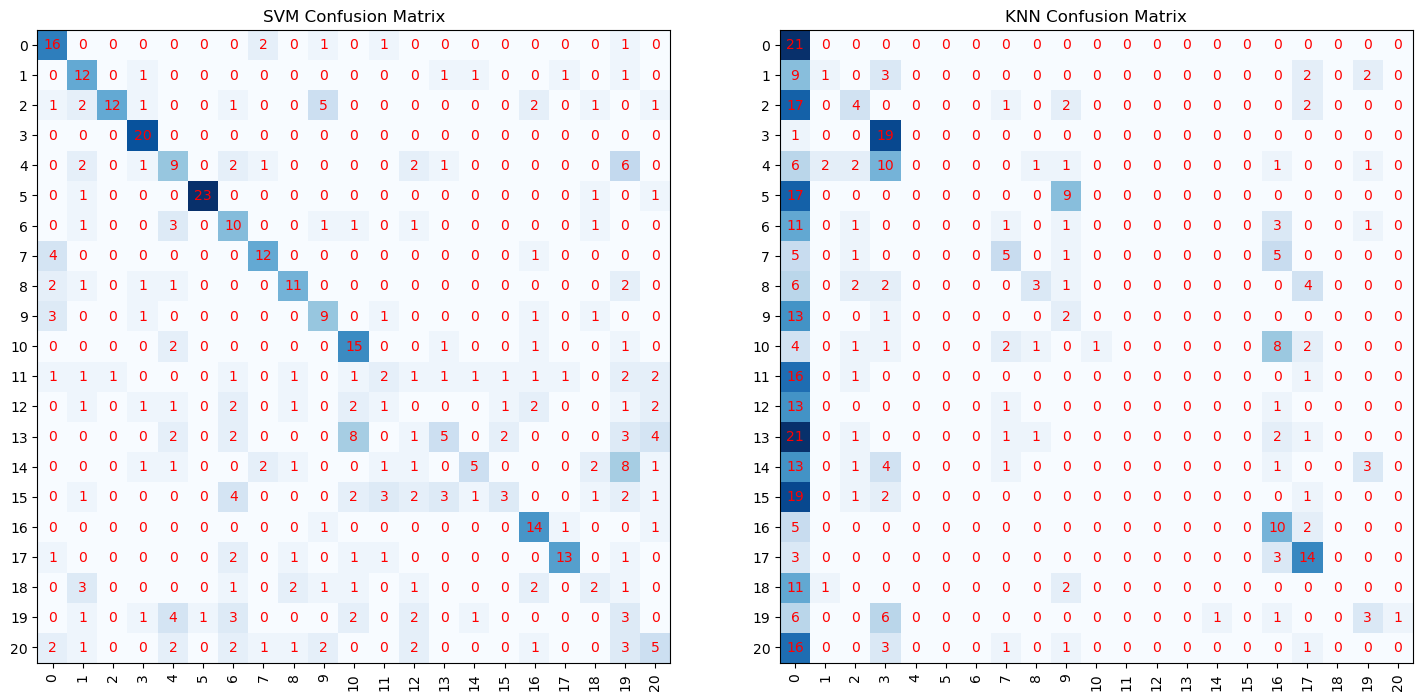

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.stats import expon, randint

# Load your dataset
X = np.load('DS_Xdata.npy')  # Features
y = np.load('Ydata.npy')  # Labels

# Flatten the images for traditional machine learning algorithms
n_samples = len(X)
X_flattened = X.reshape((n_samples, -1))  # Converts 2D image into 1D feature vector

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier()

# Define the parameter distribution for SVM
svm_params = {
    'C': expon(scale=100),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Define the parameter distribution for KNN
knn_params = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Random search with cross-validation for SVM, reduced n_iter for faster computation
svm_random_search = RandomizedSearchCV(
    svm_model, svm_params, n_iter=3, cv=3, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1
)
svm_random_search.fit(X_train_scaled, y_train.ravel())

# Random search with cross-validation for KNN, reduced n_iter for faster computation
knn_random_search = RandomizedSearchCV(
    knn_model, knn_params, n_iter=3, cv=3, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1
)
knn_random_search.fit(X_train_scaled, y_train.ravel())

# Predictions with the best models
y_pred_svm = svm_random_search.best_estimator_.predict(X_test_scaled)
y_pred_knn = knn_random_search.best_estimator_.predict(X_test_scaled)

# Evaluate the best models
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print the best parameters and the performance
print('Best parameters for SVM:', svm_random_search.best_params_)
print('Best SVM Accuracy:', svm_accuracy)

print('Best parameters for KNN:', knn_random_search.best_params_)
print('Best KNN Accuracy:', knn_accuracy)

plt.tight_layout()
plt.show()

# ... (previous code remains unchanged)

# Predictions with the best models
y_pred_svm = svm_random_search.best_estimator_.predict(X_test_scaled)
y_pred_knn = knn_random_search.best_estimator_.predict(X_test_scaled)

# Evaluate the best models
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
svm_confusion = confusion_matrix(y_test, y_pred_svm)
knn_confusion = confusion_matrix(y_test, y_pred_knn)
svm_classification_report = classification_report(y_test, y_pred_svm)
knn_classification_report = classification_report(y_test, y_pred_knn)

# Print the best parameters and the performance
print('Best parameters for SVM:', svm_random_search.best_params_)
print('Best SVM Accuracy:', svm_accuracy)
print('SVM Confusion Matrix:\n', svm_confusion)
print('SVM Classification Report:\n', svm_classification_report)

print('Best parameters for KNN:', knn_random_search.best_params_)
print('Best KNN Accuracy:', knn_accuracy)
print('KNN Confusion Matrix:\n', knn_confusion)
print('KNN Classification Report:\n', knn_classification_report)

# Visualize the confusion matrices for SVM and KNN
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# SVM Confusion Matrix
axes[0].imshow(svm_confusion, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xticks(np.arange(len(np.unique(y))))
axes[0].set_yticks(np.arange(len(np.unique(y))))
axes[0].set_xticklabels(np.unique(y), rotation=90)
axes[0].set_yticklabels(np.unique(y))

# Loop over data dimensions and create text annotations for SVM.
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        axes[0].text(j, i, svm_confusion[i, j], ha="center", va="center", color="red")

# KNN Confusion Matrix
axes[1].imshow(knn_confusion, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('KNN Confusion Matrix')
axes[1].set_xticks(np.arange(len(np.unique(y))))
axes[1].set_yticks(np.arange(len(np.unique(y))))
axes[1].set_xticklabels(np.unique(y), rotation=90)
axes[1].set_yticklabels(np.unique(y))

# Loop over data dimensions and create text annotations for KNN.
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        axes[1].text(j, i, knn_confusion[i, j], ha="center", va="center", color="red")

plt.tight_layout()
plt.show()
